In [12]:
from MCS import *

In [31]:
# Simulate data and predicts
def DataGeneratingProcess(a0, a1, a2, b1, N):
    y = np.zeros(N)
    np.random.seed(123)
    y[0] = 5
    epsilon = np.random.normal(0,b1,N)
    for t in range(1, N-1):
        y[t+1] = a0 + a1*y[t-1]+a2*y[t-2]+epsilon[t]
    return y

N = 100
y  = DataGeneratingProcess(0.1,0.8,-0.2,0.3,N)
x1 = DataGeneratingProcess(0.1,0.75,-0.2,0.3,N)
x2 = DataGeneratingProcess(0.1,0.9,-0.2,0.3,N)
x3 = DataGeneratingProcess(0.1,0.0,-0.0,0.1,N)
x4 = DataGeneratingProcess(0.1,0.9,-0.0,0.0,N)
x5 = DataGeneratingProcess(0.1,0.4,-0.5,0.0,N)

# Wrap data and compute the Mean Absolute Error
data = pd.DataFrame(np.c_[x1,x2,x3,x4,x5], columns=['M1','M2','M3','M4','M5'])
for model in ['M1','M2','M3','M4','M5']:
    data[model] = np.abs(data[model] - y)

In [32]:
a = DataGeneratingProcess(5, 0.8, -.25, 1, 1000)

In [23]:
import matplotlib.pyplot as plt

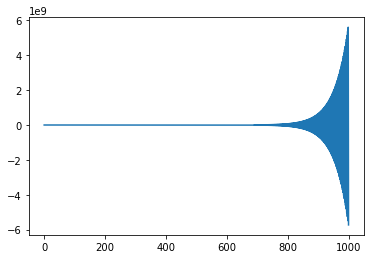

In [33]:
plt.plot(a)

In [8]:
data.head()

,M1,M2,M3,M4,M5
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.250000,0.500000,3.782874,0.825689,1.674311
3,0.000000,0.000000,0.800531,0.700796,1.799204
4,0.426083,0.927166,3.873921,1.135392,2.663280


In [14]:
mcs = ModelConfidenceSet(data, 0.1,3, 1000).run()

C:\Marci\CEU\ThesisDONTUSETHIS\CODE\PYTHON\MCS.py:70: RuntimeWarning: invalid value encountered in true_divide
  z0 = (dijbarstar - np.expand_dims(dijbar, 0)) / np.sqrt(
C:\Marci\CEU\ThesisDONTUSETHIS\CODE\PYTHON\MCS.py:73: RuntimeWarning: divide by zero encountered in true_divide
  zdata0 = dijbar / np.sqrt(vardijbar)
C:\Marci\CEU\ThesisDONTUSETHIS\CODE\PYTHON\MCS.py:63: RuntimeWarning: invalid value encountered in greater
  pval = np.mean(empdistTSQ > TSQ)
C:\Marci\CEU\ThesisDONTUSETHIS\CODE\PYTHON\MCS.py:94: RuntimeWarning: divide by zero encountered in true_divide
  t = dibar / np.sqrt(vardi)


In [15]:
mcs

In [17]:
mcs.pvalues

M2    0.0
M4    0.0
M3    0.0
M5    0.0
M1    1.0
dtype: float64

In [18]:
mcs.included

['M1']